<a href="https://colab.research.google.com/github/atorr5555/proyecto-1-cripto/blob/main/Proy1Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 Criptografía

Equipo:

Gutiérrez Chávez Sergio Daniel

Mekibes Meza Malik

Torres Verastegui José Antonio

## Instalando bibliotecas necesarias

In [25]:
!pip install pycryptodome
!pip install XlsxWriter
!pip install matplotlib

In [26]:
import xlsxwriter
import time
from base64 import b64encode, b64decode
from Crypto.Cipher import ChaCha20
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

## Creación pruebas para *algoritmos*

### Chacha20

Key Size 256 bits

#### Encrypt

In [27]:
def Chacha_20_test(key : str, plaintext : str):
    inicio = 0
    inicio = time.perf_counter()
    b= bytes(plaintext, 'utf-8')
    #Creando el cifrador
    chacha_cypher = ChaCha20.new(key = key)
    #creando el objeto para cifrar
    ciphertext = chacha_cypher.encrypt(b)
    #haciendo la nonce y decodificando a utf-8
    nonce = b64encode(chacha_cypher.nonce).decode('utf-8')
    ct = b64encode(ciphertext).decode('utf-8')

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return ct, res, nonce

#### Decrypt

In [28]:
def Chacha_20_test_dec(key : str, plaintext : str):
    b= bytes(plaintext, 'utf-8')

    #Creando el cifrador
    chacha_cypher = ChaCha20.new(key = key)

    #creando el objeto para cifrar
    ciphertext = chacha_cypher.encrypt(b)

    #haciendo la nonce y decodificando a utf-8
    nonce = b64encode(chacha_cypher.nonce).decode('utf-8')
    ct = b64encode(ciphertext).decode('utf-8')

    inicio = 0
    inicio = time.perf_counter()

    chacha_decrypt = ChaCha20.new(key = key, nonce = b64decode(nonce))

    pt = chacha_decrypt.decrypt(b64decode(ct))
    final = 0
    final = time.perf_counter()
    res = final - inicio

    return str(pt), res, ct

### AES-EBC

Key Size 256 bits

#### Encrypt

In [29]:
def AES_ECB_test(key : str, plaintext : str):
    inicio = 0
    inicio = time.perf_counter()
    b = bytes(plaintext, 'utf-8')
    #creamos y ciframos el texto plano
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(b, 32))
    ct = b64encode(ciphertext).decode('utf-8')

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return ct, res

#### Decrypt

In [30]:
def AES_ECB_test_dec(key : str, plaintext : str):

    b = bytes(plaintext, 'utf-8')
    #creamos y desciframos el texto cifrado
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(b, AES.block_size))
    ct = b64encode(ciphertext).decode('utf-8')

    inicio = 0
    inicio = time.perf_counter()

    pt = unpad(cipher.decrypt(ciphertext), AES.block_size)
    final = 0
    final = time.perf_counter()
    res = final - inicio
    return ct, res, str(pt)

### AES-CBC

Key Size 256 bits

#### Encrypt

In [31]:
def AES_CBC_test(key : str, plaintext : str):
    inicio = 0
    inicio = time.perf_counter()
    b = bytes(plaintext, 'utf-8')
    #creamos y ciframos el texto plano
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(b, 32))
    ct = b64encode(ciphertext).decode('utf-8')

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return ct, res

#### Decrypt

In [32]:
def AES_CBC_test_dec(key : str, plaintext : str):

    b = bytes(plaintext, 'utf-8')
    #creamos y desciframos el texto cifrado
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(b, AES.block_size))
    ct = b64encode(ciphertext).decode('utf-8')
    iv = b64encode(cipher.iv).decode('utf-8')
    aux = b64decode(ct)
    inicio = 0
    inicio = time.perf_counter()

    aes_decrypt= AES.new(key, AES.MODE_CBC, b64decode(iv))
    pt = unpad(aes_decrypt.decrypt(ciphertext), AES.block_size)

    final = 0
    final = time.perf_counter()
    res = final - inicio
    return ct, res, str(pt)

### SHA-2

Hash size 384 bits

In [33]:
from Crypto.Hash import SHA384

def sha2_384_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA384.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### SHA-2

Hash size 512 bits

In [34]:
from Crypto.Hash import SHA512

def sha2_512_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA512.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### SHA-3

Hash size 384 bits

In [35]:
from Crypto.Hash import SHA3_384

def sha3_384_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA3_384.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### SHA-3

Hash size 512 bits

In [36]:
from Crypto.Hash import SHA3_512

def sha3_512_test(input):
  byte_stream = bytes(input, 'utf-8')
  h = SHA3_512.new()
  inicio = time.perf_counter()
  h.update(byte_stream)
  final = time.perf_counter()
  return (final - inicio, h.hexdigest())

### RSA-OAEP

1024 bits

### RSA-PSS

1024 bits

### ECDSA Prime Field

ECDSA, 521 Bits (Prime Field)

### ECDSA Binary Field

ECDSA, 571 Bits (Binary Field, Koblitz Curve)

## Resultados

### Tablas utilzando Pandas

In [37]:
import pandas as pd

In [38]:
f = open('plain_text.txt')
vectors = []
for line in f:
  vectors.append(line.replace('\n', ''))
vectors

['f714a27cd2d1bc754f5e4972ab940d366a754e029b6536655d977956a2c53880332424ddf597e6866a22bfca7aa26b7d74bc4c925014c4ed37bfe37245fa42628d1c2ee75dc909edc469ee3452d894',
 '5fe35923b4e0af7dd24971812a58425519850a506dfa9b0d254795be785786c319a2567cbaa5e35bcf8fe83d943e23fa5169b73adc1fcf8b607084b15e6a013df147e46256e4e803ab75c110f77848136be7d806e8b2f868c16c3a90c14463407038cb7d9285079ef162c6a45cedf9c9f066375c969b5fcbcda37f02aacff4f31cded3767570885426bebd9eca877e44674e9ae2f0c24cdd0e7e1aaf1ff2fe7f80a1c4f5078eb34cd4f06fa94a2d1eab5806ca43fd0f06c60b63d5402b95c70c21ea65a151c5cfaf8262a46be3c722264b',
 'ab6b92daf83275cb9c1b76cfb59fbcc8ac53188e0b6980918e7ac0c07c836ca9372d19e11251cca664bbb3c3db2e13b412a9820b65e95612042f5db24643cf9340b9808597735a1f92670ba573a2fb2f088d81087d70565574344af7576d35b2ed98318e2ca0067d4fa8e63f28045b83b6887d4ffa0668a10712ed5759',
 '035adcb639e5f28bb5c88658f45c1ce0be16e7dafe083b98d0ab45e8dcdbfa38e3234dfd973ba555b0cf8eea3c82ae1a3633fc565b7f2cc839876d3989f35731be371f60de140e3c916231ec780e5

#### Hashing

In [57]:
def genera_prueba(vector, index, length):
  list_tests = []
  for i in range(20):
    dict_round = {}
    dict_round['Vector Number'] = index
    dict_round['Test Vectors'] = vector
    dict_round['Length of vector in Bytes'] = length
    dict_round['SHA-2 384'] = sha2_384_test(vector)[0]
    dict_round['SHA-2 512'] = sha2_512_test(vector)[0]
    dict_round['SHA-3 384'] = sha3_384_test(vector)[0]
    dict_round['SHA-3 512'] = sha3_512_test(vector)[0]
    list_tests.append(dict_round)
  return list_tests

In [80]:
lista = []
i = 0
for vector in vectors:
  lista += genera_prueba(vector, i, len(vector.encode('utf-8')))
  i += 1

In [86]:
pd.set_option("display.precision", 12)
hash_data = pd.DataFrame(lista)
hash_data = hash_data.sort_values(by=['Length of vector in Bytes'])
hash_data

,Vector Number,Test Vectors,Length of vector in Bytes,SHA-2 384,SHA-2 512,SHA-3 384,SHA-3 512
0,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000054796001,0.000035539997,0.000012493001,0.000028464001
18,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000002335000,0.000002162000,0.000002534001,0.000003163001
17,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000002340999,0.000002164998,0.000002457000,0.000003174002
16,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000002372999,0.000002215998,0.000002476998,0.000003138000
15,0,f714a27cd2d1bc754f5e4972ab940d366a754e029b6536...,158,0.000002429002,0.000002421999,0.000002523000,0.000003123001
...,...,...,...,...,...,...,...
161,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000009159001,0.000009012001,0.000014352001,0.000020135001
160,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000009153999,0.000009085998,0.000014336001,0.000020146002
178,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000009100000,0.000008980001,0.000014333000,0.000020091000
168,8,d43522210236c67e4981bf3f441b941cd52c5732b94ad7...,2042,0.000009063999,0.000008970001,0.000020021998,0.000020208001


In [85]:
hash_data_mean = hash_data.groupby('Length of vector in Bytes').mean()
hash_data_mean.set_index('Vector Number')
hash_data_mean

,Vector Number,SHA-2 384,SHA-2 512,SHA-3 384,SHA-3 512
Length of vector in Bytes,,,,,
158,0,0.000006119550,0.000004807800,0.000003865850,0.000005051000
250,2,0.000002440950,0.000002238200,0.000003261250,0.000003870249
418,1,0.000005051700,0.000005428999,0.000005768599,0.000007567800
628,3,0.000003932250,0.000003706100,0.000006525900,0.000007113650
1020,6,0.000005258701,0.000005780951,0.000007922300,0.000011073950
1258,4,0.000006211750,0.000006032100,0.000009793551,0.000013435550
1468,5,0.000007569350,0.000007027301,0.000011151450,0.000014915800
1750,7,0.000008101700,0.000007963700,0.000012411250,0.000018165450
2042,8,0.000009113850,0.000009382500,0.000014677900,0.000020299350


##### Gráficas

In [42]:
import matplotlib.pyplot as plt

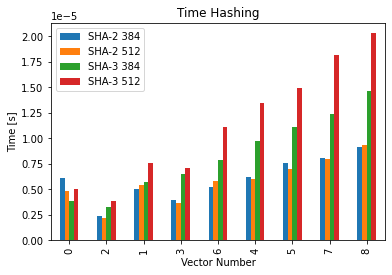

In [83]:
ax = hash_data_mean[['Vector Number', 'SHA-2 384', 'SHA-2 512', 'SHA-3 384', 'SHA-3 512']].plot(x='Vector Number',
        kind='bar',
        stacked=False,
        title='Time Hashing',
        ylabel='Time [s]')
ax

### Creación de tablas Excel

#### Encrypt

In [44]:
###########Creación de excel de Encriptaciones##################
workbookE = xlsxwriter.Workbook('Resultados_Encriptar.xlsx')
worksheetE = workbookE.add_worksheet()

#formato de celda
cell_format = workbookE.add_format()
cell_format.set_bold(True)
cell_format.set_bg_color('yellow')
cell_format.set_align('center')
cell_format.set_border(6)
cell_format.set_font_size(14)

worksheetE.set_column(0,0,20)
worksheetE.set_column(1,2,60)
worksheetE.set_column(3,4,20)
worksheetE.set_column(5,7,40)

row = 1
col = 0

worksheetE.write('A1', 'Algorithm', cell_format)
worksheetE.write('B1', 'Plaintext', cell_format)
worksheetE.write('C1', 'Ciphertext', cell_format)
worksheetE.write('D1', 'Time', cell_format)
worksheetE.write('E1', 'Operacion', cell_format)
worksheetE.write('F1', 'Promedio ChaCha20', cell_format)
worksheetE.write('G1', 'Promedio AES_ECB', cell_format)
worksheetE.write('H1', 'Promedio AES_CBC', cell_format)


worksheetE.write_array_formula('F2:F2','{=AVERAGE(D2:D9)}')
worksheetE.write_array_formula('G2:G2','{=AVERAGE(D10:D17)}')
worksheetE.write_array_formula('H2:H2','{=AVERAGE(D17:D25)}')

0

#### Decrypt

In [45]:
###########Creación de excel de Decriptaciones##################
workbookD = xlsxwriter.Workbook('Resultados_Decriptar.xlsx')
worksheetD = workbookD.add_worksheet()

#formato de celda
cell_format = workbookD.add_format()
cell_format.set_bold(True)
cell_format.set_bg_color('yellow')
cell_format.set_align('center')
cell_format.set_border(6)
cell_format.set_font_size(14)

worksheetD.set_column(0,0,20)
worksheetD.set_column(1,2,60)
worksheetD.set_column(3,4,20)
worksheetD.set_column(5,7,60)

row = 1
col = 0
worksheetD.write('A1', 'Algorithm', cell_format)
worksheetD.write('B1', 'Ciphertext', cell_format)
worksheetD.write('C1', 'Plaintext', cell_format)
worksheetD.write('D1', 'Time', cell_format)
worksheetD.write('E1', 'Operacion', cell_format)
worksheetD.write('F1', 'Promedio ChaCha20', cell_format)
worksheetD.write('G1', 'Promedio AES_ECB', cell_format)
worksheetD.write('H1', 'Promedio AES_CBC', cell_format)


worksheetD.write_array_formula('F2:F2','{=AVERAGE(D2:D9)}')
worksheetD.write_array_formula('G2:G2','{=AVERAGE(D10:D17)}')
worksheetD.write_array_formula('H2:H2','{=AVERAGE(D17:D25)}')

0

### Llenado de Excel

#### Encrypt

In [46]:
#Abriendo el documento de pruebas
f = open('plain_text.txt')
keys = []
i = 0

#realizando las mediciones y pruebas
for linea in f:
    #ChaCha20
    key = get_random_bytes(32)
    keys.append(key)
    worksheetE.write(row, col, 'ChaCha20')
    ciphertext, tiempo, nonce = Chacha_20_test(key, linea)

    worksheetE.write(row, col + 4, 'Cifrar')
    worksheetE.write(row, col + 1, linea)
    worksheetE.write(row, col + 2, ciphertext)
    worksheetE.write_number(row, col + 3, tiempo)
    row += 1

f.close()
f = open('plain_text.txt')
i = 0

for linea in f:
    #AES_ECB
    worksheetE.write(row, col, 'AES_ECB')
    ciphertext, tiempo = AES_ECB_test(keys[i], linea)
    i += 1

    worksheetE.write(row, col + 4, 'Cifrar')
    worksheetE.write(row, col + 1, linea)
    worksheetE.write(row, col + 2, ciphertext)
    worksheetE.write_number(row, col + 3, tiempo)
    row += 1


f.close()
f = open('plain_text.txt')

i = 0

for linea in f:
    #AES_CBC
    worksheetE.write(row, col, 'AES_CBC')
    ciphertext, tiempo = AES_CBC_test(keys[i], linea)
    i += 1

    worksheetE.write(row, col + 4, 'Cifrar')
    worksheetE.write(row, col + 1, linea)
    worksheetE.write(row, col + 2, ciphertext)
    worksheetE.write_number(row, col + 3, tiempo)

    row += 1

f.close()
workbookE.close()


#### Decrypt

In [47]:
#Abriendo el documento de pruebas
keys = []
i = 0
f = open('plain_text.txt')
#realizando las mediciones y pruebas

for linea in f:

    #ChaCha20
    key = get_random_bytes(32)
    keys.append(key)
    plaintext, tiempo, ct = Chacha_20_test_dec(key, linea)
    i += 1
    worksheetD.write(row, col, 'ChaCha20')
    worksheetD.write(row, col + 4, 'Descifrar')
    worksheetD.write(row, col + 1, ct)
    worksheetD.write(row, col + 2, plaintext)
    worksheetD.write_number(row, col + 3, tiempo)

    row += 1

f.close()

f = open('plain_text.txt')
i = 0
for linea in f:

    #AES_ECB
    worksheetD.write(row, col, 'AES_ECB')
    ciphertext, tiempo, pt = AES_ECB_test_dec(keys[i], linea)
    i += 1

    worksheetD.write(row, col + 4, 'Descifrar')
    worksheetD.write(row, col + 1, linea)
    worksheetD.write(row, col + 2, ciphertext)
    worksheetD.write_number(row, col + 3, tiempo)

    row += 1

f.close()

i = 0
f = open('plain_text.txt')
for linea in f:

    #AES_CBC
    worksheetD.write(row, col, 'AES_CBC')
    ciphertext, tiempo, plaintext = AES_CBC_test_dec(keys[i], linea)
    i += 1
    worksheetD.write(row, col + 4, 'Descifrar')
    worksheetD.write(row, col + 1, linea)
    worksheetD.write(row, col + 2, ciphertext)
    worksheetD.write_number(row, col + 3, tiempo)

    row += 1

f.close()
workbookD.close()